In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sms=pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
print('shape = >',sms.shape)

shape = > (2893, 3)


In [4]:
print('ham and spam counts','\n',sms.label.value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [5]:
print('spam ratio =', round(len(sms[sms['label']==1]) / len(sms.label),2)*100,'%')
print('ham ratio =', round(len(sms[sms['label']==0]) / len(sms.label),2)*100,'%')

spam ratio = 17.0 %
ham ratio = 83.0 %


In [6]:
sms['length']=sms.message.str.len()

In [7]:
sms['sub_length']=sms.subject.str.len()
sms.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  \
0  content - length : 3386 apple-iss research cen...      0    2856   
1  lang classification grimes , joseph e . and ba...      0    1800   
2  i am posting this inquiry for sergei atamas ( ...      0    1435   
3  a colleague and i are researching the differin...      0     324   
4  earlier this morning i was on the phone with a...      0    1046   

   sub_length  
0        39.0  
1         NaN  
2        50.0  
3         4.0  
4        24.0

In [8]:
#exploring categorical columns
for column in sms.columns:
    if sms[column].dtypes == object:
        print(str(column) + ' : ' + str(sms[column].unique()))
        print(sms[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

subject : ['job posting - apple-iss research center' nan
 'query : letter frequencies for text identification' ...
 'you have been asked to join kiddin' "anglicization of composers ' names"
 're : american - english in australia']
sociolinguistics                                                                 8
re :                                                                             7
conference announcement                                                          6
syntax                                                                           6
new on capitalfm . com                                                           5
                                                                                ..
job : linguistics at delaware                                                    1
cartoons                                                                         1
gls 1995 schedule ( updated 1 / 19 / 95 )                                        1
using and acquiring th

In [9]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject     2831 non-null   object 
 1   message     2893 non-null   object 
 2   label       2893 non-null   int64  
 3   length      2893 non-null   int64  
 4   sub_length  2831 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 113.1+ KB


In [10]:
sms.isnull().sum()

subject       62
message        0
label          0
length         0
sub_length    62
dtype: int64

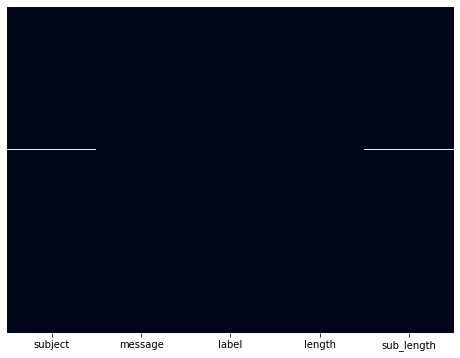

In [11]:
#Visualizing missing values through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sms.isnull(),yticklabels=False,cbar=False)

In [12]:
#dropping rows with missing values
sms=sms.dropna()

In [13]:
print('ham and spam counts','\n',sms.label.value_counts())

ham and spam counts 
 0    2363
1     468
Name: label, dtype: int64


In [14]:
sms['message']=sms['message'].str.lower()

In [15]:
sms['subject']=sms['subject'].str.lower()

In [16]:
sms.head()

subject  \
0            job posting - apple-iss research center   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   

                                             message  label  length  \
0  content - length : 3386 apple-iss research cen...      0    2856   
2  i am posting this inquiry for sergei atamas ( ...      0    1435   
3  a colleague and i are researching the differin...      0     324   
4  earlier this morning i was on the phone with a...      0    1046   
5  content - length : 4437 call for papers is the...      0    4492   

   sub_length  
0        39.0  
2        50.0  
3         4.0  
4        24.0  
5        51.0

In [17]:
sms['message']=sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

sms['message']=sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

sms['message']=sms['message'].str.replace(r'£|\$', 'dollers')

sms['message']=sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

sms['message']=sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [18]:
#remove punctuation
sms['message']=sms['message'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
sms['message']=sms['message'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
sms['message']=sms['message'].str.replace(r'^\s+|\s+?$', '')

In [19]:
sms['subject']=sms['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

sms['subject']=sms['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

sms['subject']=sms['subject'].str.replace(r'£|\$', 'dollers')

sms['subject']=sms['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

sms['subject']=sms['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [20]:
#remove punctuation
sms['subject']=sms['subject'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
sms['subject']=sms['subject'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
sms['subject']=sms['subject'].str.replace(r'^\s+|\s+?$', '')

In [21]:
sms.head()

subject  \
0              job posting apple iss research center   
2   query letter frequencies for text identification   
3                                               risk   
4                           request book information   
5  call for abstracts optimality in syntactic theory   

                                             message  label  length  \
0  content length numbr apple iss research center...      0    2856   
2  i am posting this inquiry for sergei atamas sa...      0    1435   
3  a colleague and i are researching the differin...      0     324   
4  earlier this morning i was on the phone with a...      0    1046   
5  content length numbr call for papers is the be...      0    4492   

   sub_length  
0        39.0  
2        50.0  
3         4.0  
4        24.0  
5        51.0

In [22]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [23]:
sms['clean_length'] = sms.message.str.len()

In [24]:
stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

sms['subject'] = sms['subject'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [25]:
sms['clean_sublength'] = sms.subject.str.len()
sms.head()

subject  \
0         job posting apple iss research center   
2  query letter frequencies text identification   
3                                          risk   
4                      request book information   
5    call abstracts optimality syntactic theory   

                                             message  label  length  \
0  content length numbr apple iss research center...      0    2856   
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   
3  colleague researching differing degrees risk p...      0     324   
4  earlier morning phone friend mine living south...      0    1046   
5  content length numbr call papers best good eno...      0    4492   

   sub_length  clean_length  clean_sublength  
0        39.0          2179               37  
2        50.0          1064               44  
3         4.0           210                4  
4        24.0           629               24  
5        51.0          3370               42

In [26]:
print('original message length', sms.length.sum())
print('clean message length', sms.clean_length.sum())
print('original subject length', sms.sub_length.sum())
print('clean subject length', sms.clean_sublength.sum())

original message length 9186422
clean message length 6644116
original subject length 91663.0
clean subject length 78349


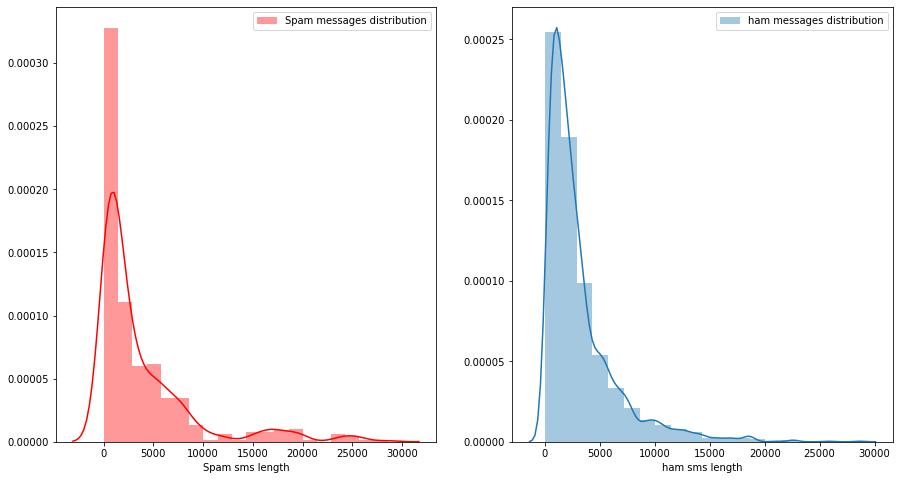

In [27]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

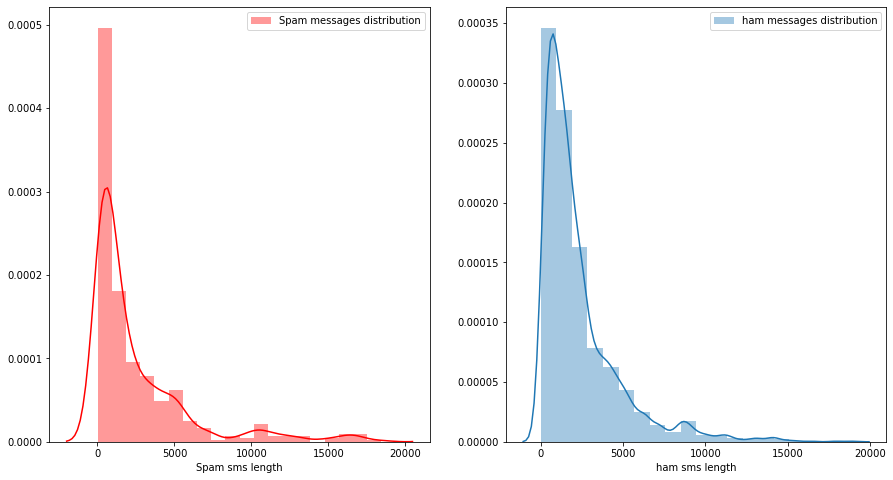

In [28]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()
f.savefig('sms distribution')

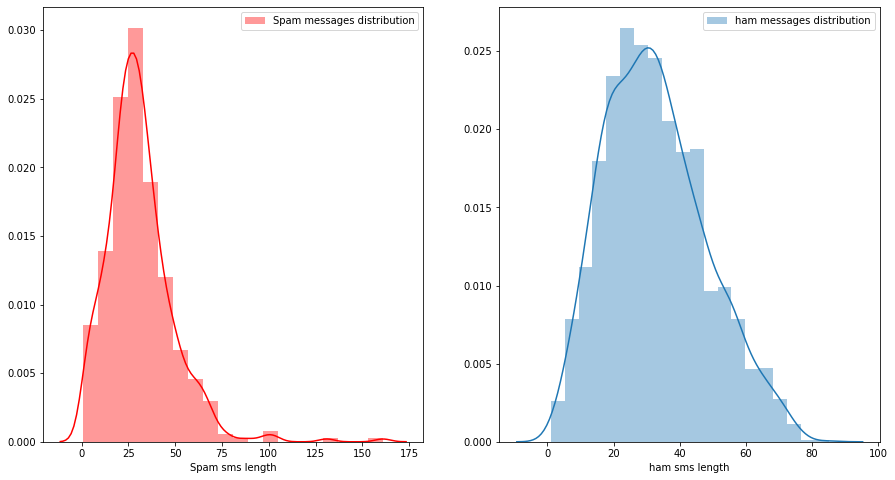

In [29]:
#subject distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['sub_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['sub_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

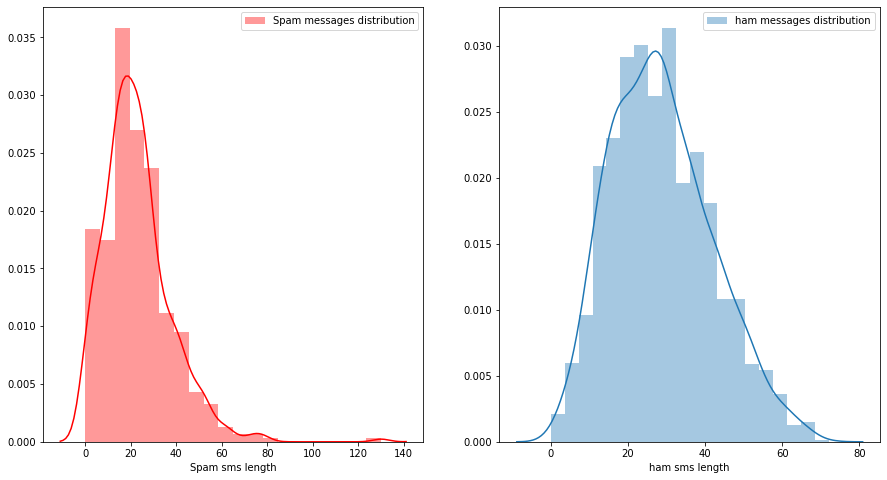

In [30]:
#subject distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['clean_sublength'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_sublength'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()
f.savefig('subject distribution')

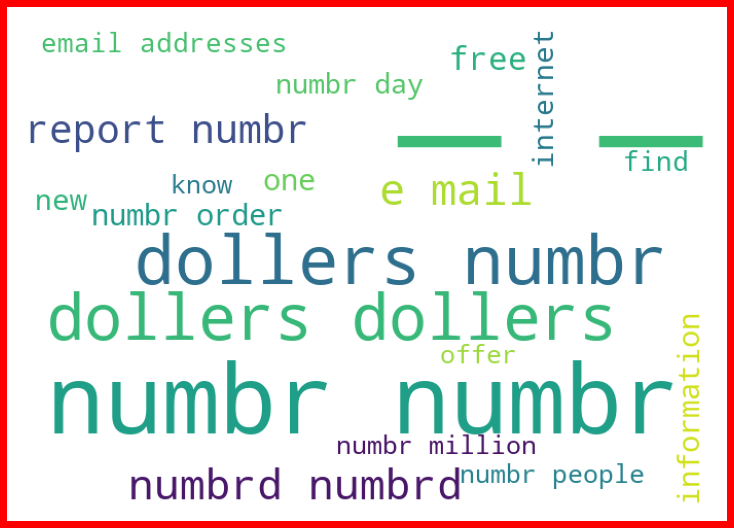

In [31]:
#getting sense of message Loud words in spam
from wordcloud import WordCloud

spams=sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

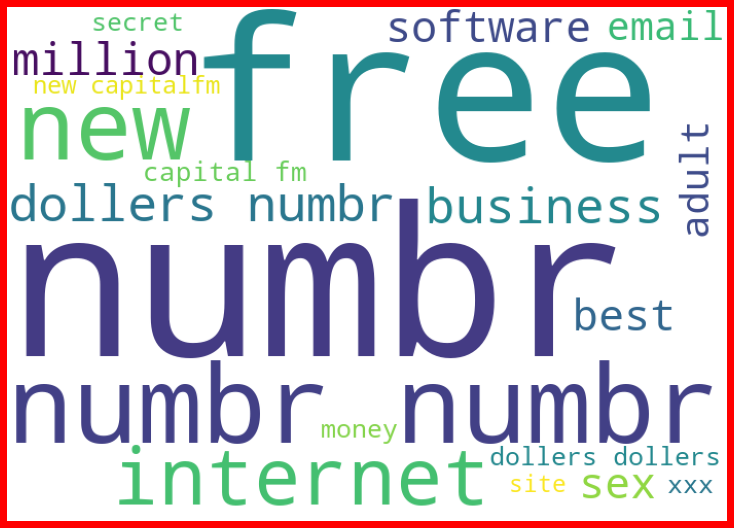

In [32]:
#getting sense of subject Loud words in spam
from wordcloud import WordCloud

spams=sms['subject'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

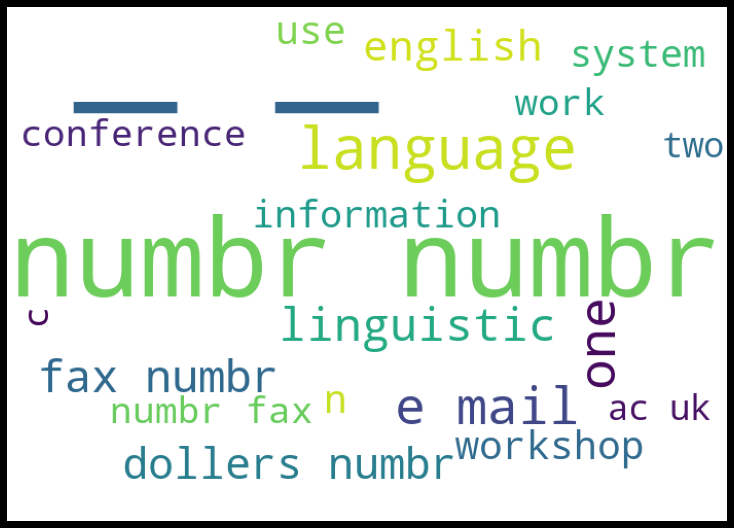

In [33]:
#getting sense of message Loud words in ham

spams=sms['message'][sms['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

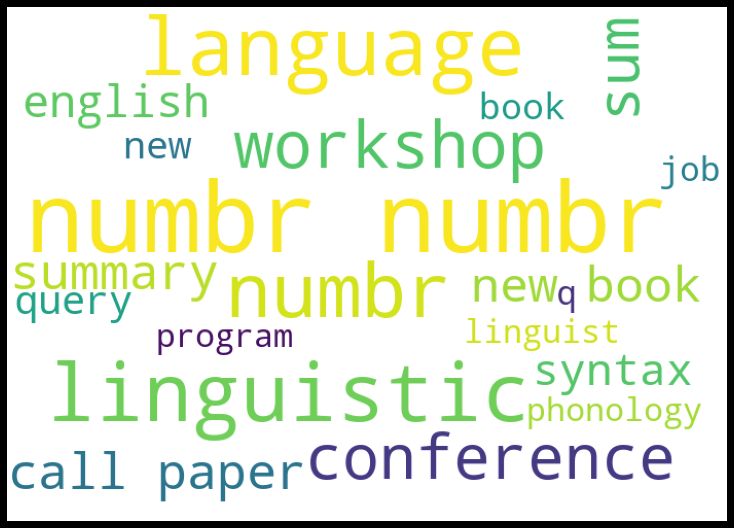

In [34]:
#getting sense of subject Loud words in ham

spams=sms['subject'][sms['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(sms['message'],sms['subject'])

In [43]:
x=feature1

In [44]:
y=sms['label']

In [45]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [46]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 1903, 1: 361})
The number of classes after fit Counter({0: 1903, 1: 1427})


In [47]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [48]:
KNN=KNeighborsClassifier(n_neighbors=6)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [49]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.43738977072310403


Cross_Val_Score =  0.962907480216991


roc_auc_score =  0.6532608695652173


classification_report
               precision    recall  f1-score   support

           0       1.00      0.31      0.47       460
           1       0.25      1.00      0.40       107

    accuracy                           0.44       567
   macro avg       0.63      0.65      0.44       567
weighted avg       0.86      0.44      0.46       567



[[141 319]
 [  0 107]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** LogisticRegression ********************************************************


LogisticRegression()


Accuracy_score =  0.9911816578483245


Cross_Val_Score =  0.9547827601652316


roc_auc_score =  0.9766355140186915


classification_report
               p

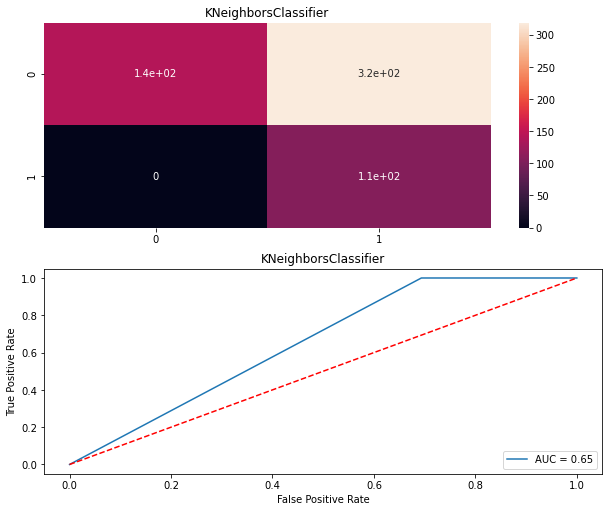

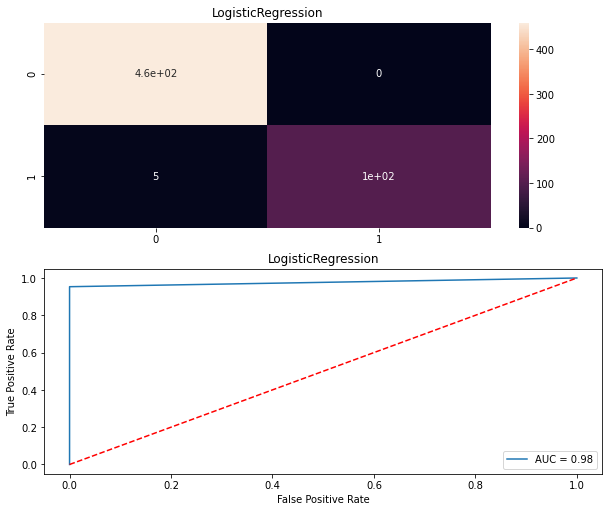

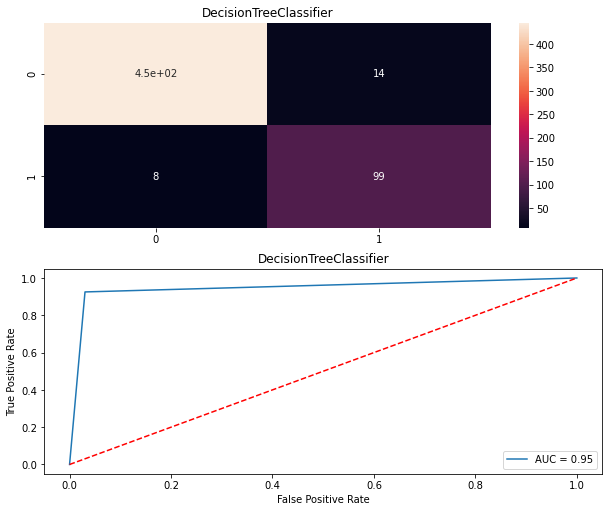

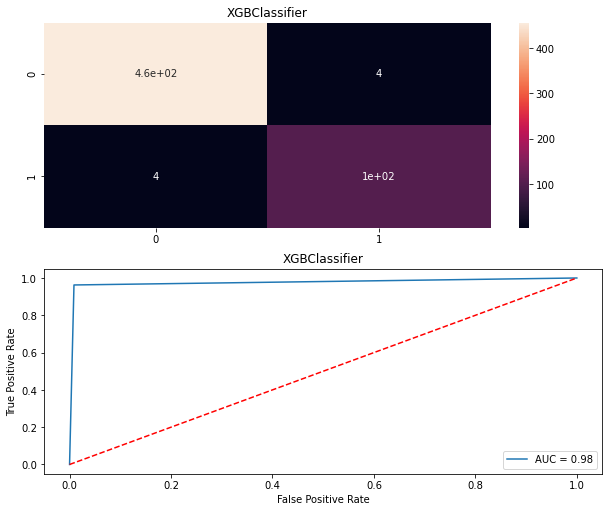

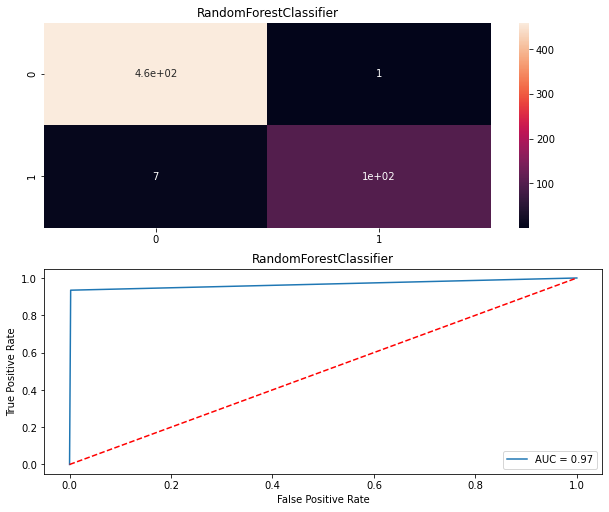

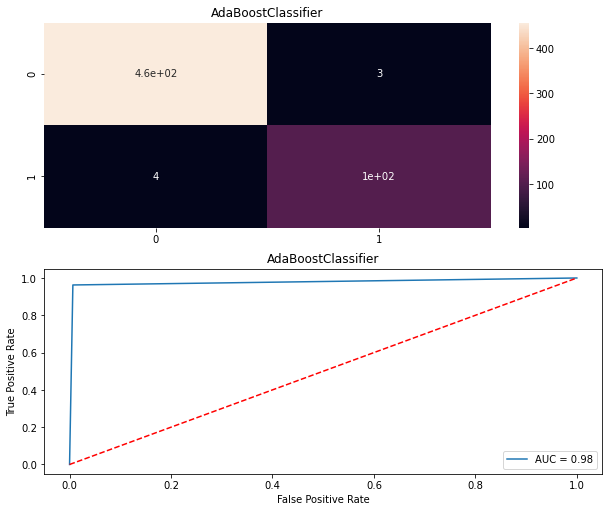

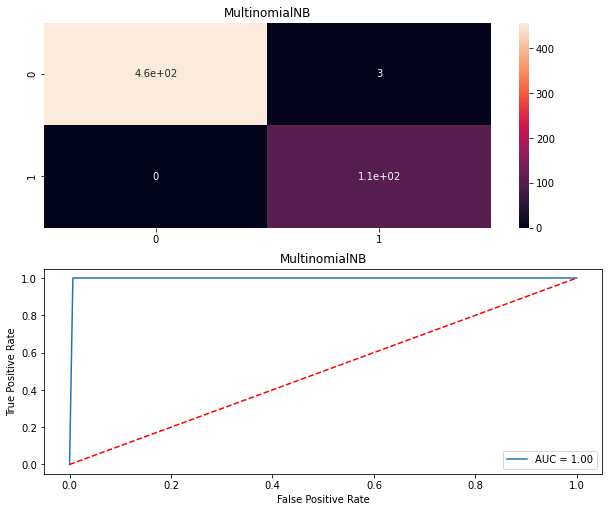

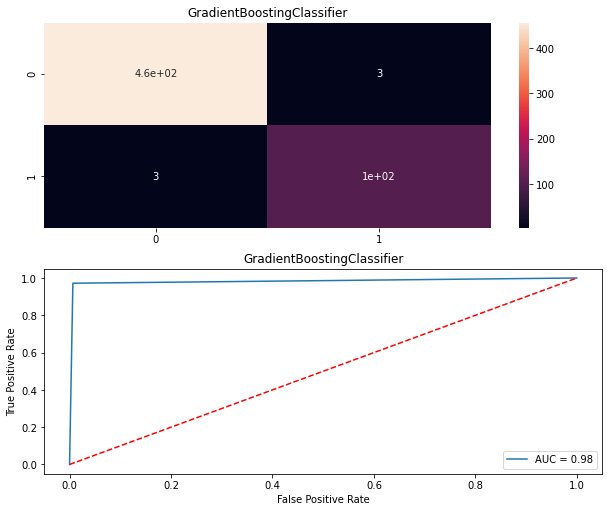

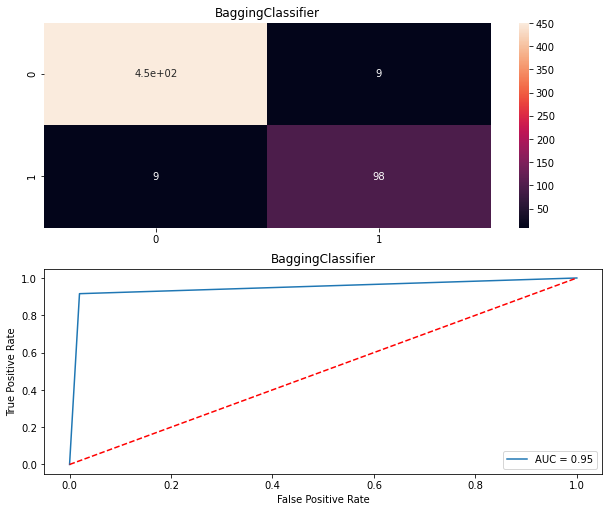

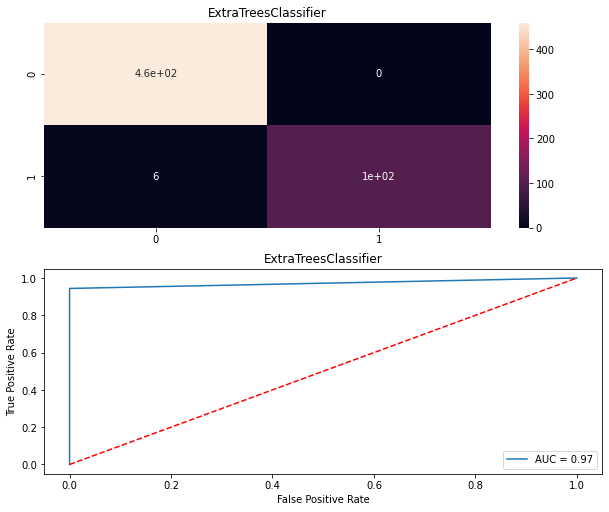

In [50]:
Model= []
score= []
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [51]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0        KNeighborsClassifier       43.738977        96.290748      65.326087
1          LogisticRegression       99.118166        95.478276      97.663551
2      DecisionTreeClassifier       96.119929        95.160753      94.739943
3               XGBClassifier       98.589065        98.481063      97.696059
4      RandomForestClassifier       98.589065        97.174514      96.620276
5          AdaBoostClassifier       98.765432        98.304509      97.804754
6               MultinomialNB       99.470899        86.259767      99.673913
7  GradientBoostingClassifier       98.941799        97.139053      98.272044
8           BaggingClassifier       96.825397        96.468049      94.816132
9        ExtraTreesClassifier       98.941799        97.174016      97.196262

## Based on the confusion matrix we save MultinomialNB as our final model

In [52]:
#saving our model

import joblib
joblib.dump(MNB,'MNB_Spam_classification.csv')

['MNB_Spam_classification.csv']

In [53]:
model=joblib.load('MNB_Spam_classification.csv')

In [54]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 